In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
diabetes = pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv')
#print(diabetes.columns)
#print(diabetes)

In [22]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
print('dimensions of diabetes data: ', diabetes.shape)

dimensions of diabetes data:  (768, 9)


In [24]:
print(diabetes.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


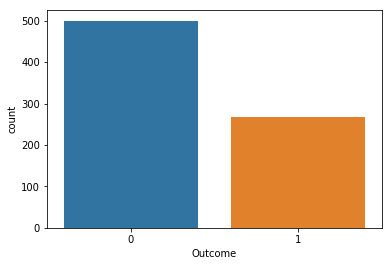

In [25]:
import seaborn as sns
sns.countplot(diabetes['Outcome'],label="Count")

In [26]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [27]:
# split datasets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes.loc[:, diabetes.columns != 'Outcome'], diabetes['Outcome'], stratify=diabetes['Outcome'], random_state=66)


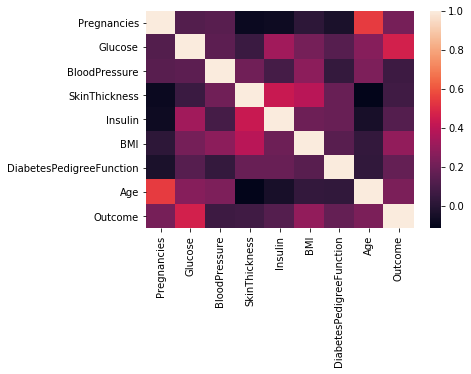

In [28]:
# Heat map
# Data visualization
# building correlation matrix

sns.heatmap(diabetes.corr())

**Feature Scaling**

In [29]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

**KNN Algorithm**

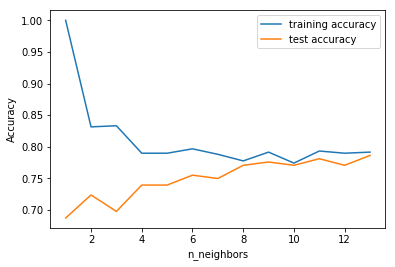

In [30]:
# applying KNN algorithm
# prediction best k value
from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 14)
for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

Without Feature Scaling

In [31]:
# best value for k=9
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.79
Accuracy of K-NN classifier on test set: 0.78


With Feature Scaling

In [32]:
knn=KNeighborsClassifier(n_neighbors)
knn.fit(X_train_scaled, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train_scaled, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test_scaled, y_test)))

Accuracy of K-NN classifier on training set: 0.76
Accuracy of K-NN classifier on test set: 0.77


**Analysis**
    KNN without feature scaling gives slightly better results both on test data and training data.best prediction is- Training data-0.79, Test data-0.78

**Logistic Regression Algorithm**

In [33]:
# logistic regression model
# default C=1
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.781
Test set score: 0.771


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [34]:
# taking C=0.01
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set accuracy: 0.700
Test set accuracy: 0.703


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [35]:
# taking C=100
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set accuracy: 0.785
Test set accuracy: 0.766


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


With feature scaling

In [36]:
# taking C=100
logreg100 = LogisticRegression(C=100).fit(X_train_scaled, y_train)
print("Training set accuracy: {:.3f}".format(logreg100.score(X_train_scaled, y_train)))
print("Test set accuracy: {:.3f}".format(logreg100.score(X_test_scaled, y_test)))

Training set accuracy: 0.785
Test set accuracy: 0.776


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


**Anylysis**
    Logistic regression with feature scaling and c=100 gives the best prediction. Best prediction is Training data-0.785 and Test data-0.776.

**Decision Tree**

In [37]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.714


In [38]:
# Tree depth is 3
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.773
Accuracy on test set: 0.740


With feature scaling

In [39]:
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test_scaled, y_test)))

Accuracy on training set: 0.773
Accuracy on test set: 0.729


In [42]:
# Feature rating on scale of 0 to 1
print("Feature importances:\n{}".format(tree.feature_importances_))


Feature importances:
[0.04554275 0.6830362  0.         0.         0.         0.27142106
 0.         0.        ]


**Analysis**
    Decision tree with max depth 3 wihtout feature scaling is giving best prediction. training data-0.773, test data-0.740

**Random Forest**

In [43]:
# Random Forest algorithm
# taking 100 decision trees
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.786


In [44]:
# taking max depth of tree=3 and 100 decision trees
rf1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf1.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(X_test, y_test)))

Accuracy on training set: 0.800
Accuracy on test set: 0.755


With feature scaling

In [45]:
rf1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf1.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(rf1.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(X_test_scaled, y_test)))

Accuracy on training set: 0.800
Accuracy on test set: 0.740


**Result**
    Random forest having decision trees of max depth 3 is giving best result. Random forest is giving better result than decision tree. Training data-0.800 and Test data-0.755

**SVM Algorithm**

In [ ]:
# SVM algorithm
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

In [ ]:
svc = SVC()
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test_scaled, y_test)))

In [ ]:
# changing model from underfitting to more complex model
svc = SVC(C=10)
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

**Analysis**
    C=10 and feature scaling results in drastic increase in the prediction accuracy of both training and test data. best accuracy is training data-0.882 and test data-0.807

**Deep Learning**

In [ ]:
# Deep learning algorithm
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

In [ ]:
# Deep learning algorithm testing on scaled data
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

In [ ]:
# Increase # of iteration
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

In [ ]:
# increase alpha parameter
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

**Analysis**
    Default deep learning algorithm with feature scaling is giving best prediction accuracy. training data accuracy-0.823 and test data accuracy-0.802